**Analysis of Dataset**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Dataset/merged_india_modis_files.csv')


In [3]:
df_train

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,23.6805,86.0949,318.9,1.2,1.1,2000-11-01,501,Terra,MODIS,67,6.20,303.3,12.1,D,2
1,22.7913,86.2102,326.4,1.2,1.1,2000-11-01,501,Terra,MODIS,54,6.20,299.4,19.8,D,0
2,22.7885,86.2037,320.7,1.2,1.1,2000-11-01,501,Terra,MODIS,65,6.20,299.1,15.0,D,0
3,22.7870,86.2150,319.7,1.2,1.1,2000-11-01,501,Terra,MODIS,66,6.20,298.5,13.8,D,0
4,18.7651,79.9640,315.9,2.7,1.6,2000-11-01,503,Terra,MODIS,18,6.20,298.3,28.8,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517088,21.1066,72.6336,307.9,1.5,1.2,2021-12-31,1703,Terra,MODIS,73,6.03,290.5,16.1,N,2
1517089,19.1224,76.7451,303.2,1.0,1.0,2021-12-31,1703,Terra,MODIS,54,6.03,288.0,6.5,N,0
1517090,19.2367,76.9620,304.1,1.0,1.0,2021-12-31,1703,Terra,MODIS,59,6.03,288.2,7.2,N,0
1517091,23.7817,86.3960,306.2,1.2,1.1,2021-12-31,1954,Aqua,MODIS,65,6.03,287.8,10.8,N,2


**The columns represent the following:**
- **latitude**: Latitude of the fire pixel detected by the satellite (degrees)
- **longitude**: Longitude of the fire pixel detected by the satellite (degrees)
- **brightness**: Brightness temperature of the fire pixel (in K)
- **scan**: Area of a MODIS pixel at the Earth’s surface (Along-scan: ΔS)
- **track**: Area of a MODIS pixel at the Earth’s surface (Along-track: ΔT)
- **acq_time**: Time at which the fire was detected
- **satellite**: Satellite used to detect the fire. Either Terra(T) or Aqua(A)
- **instrument**: MODIS
- **confidence**: Detection confidence (range 0-100)
- **bright_t31**: Band 31 brightness temperature of the pixel (in K)
- **frp**: Fire radiative power (in MW- megawatts)
- **daynight**: Detected during the day or night. Either Day(D) or Night(N)
- **type**: Inferred hot spot type:
   - 0= presumed vegetation fire 
   - 1= active volcano
   - 2= other static land source
   - 3= offshore

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517093 entries, 0 to 1517092
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   latitude    1517093 non-null  float64
 1   longitude   1517093 non-null  float64
 2   brightness  1517093 non-null  float64
 3   scan        1517093 non-null  float64
 4   track       1517093 non-null  float64
 5   acq_date    1517093 non-null  object 
 6   acq_time    1517093 non-null  int64  
 7   satellite   1517093 non-null  object 
 8   instrument  1517093 non-null  object 
 9   confidence  1517093 non-null  int64  
 10  version     1517093 non-null  float64
 11  bright_t31  1517093 non-null  float64
 12  frp         1517093 non-null  float64
 13  daynight    1517093 non-null  object 
 14  type        1517093 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 173.6+ MB


In [5]:
print(df_train['satellite'].value_counts())
print(df_train['daynight'].value_counts())
print(df_train['type'].value_counts())

Aqua     1055733
Terra     461360
Name: satellite, dtype: int64
D    1378285
N     138808
Name: daynight, dtype: int64
0    1466129
2      50489
3        471
1          4
Name: type, dtype: int64


We can see that:

There is a huge imbalance of classes in the type column for number 3 and 1. Hence we can drop it.

In [6]:
def drop_rows_by_condition(df, condition_column, condition_value):
    df_copy = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly
    rows_to_drop = df_copy.index[df_copy[condition_column] == condition_value].tolist()
    df_copy.drop(rows_to_drop, inplace=True)
    df_copy.reset_index(drop=True, inplace=True)
    return df_copy

In [7]:
new_df_train = drop_rows_by_condition(df_train, 'type', 3)
new_df_train = drop_rows_by_condition(df_train, 'type', 1)

Handling categorical values
- Since we have 2 values (Terra and Aqua) for satellite, we can use a binary encoder

In [ ]:
!pip install category_encoders

In [12]:
import category_encoders as ce

In [13]:
encoder = ce.BinaryEncoder(cols=['satellite'])
df_train = encoder.fit_transform(df_train)
encoder = ce.BinaryEncoder(cols=['daynight'])
df_train = encoder.fit_transform(df_train)

In [14]:
df_train.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite_0,satellite_1,instrument,confidence,version,bright_t31,frp,daynight_0,daynight_1,type
0,23.6805,86.0949,318.9,1.2,1.1,2000-11-01,501,0,1,MODIS,67,6.2,303.3,12.1,0,1,2
1,22.7913,86.2102,326.4,1.2,1.1,2000-11-01,501,0,1,MODIS,54,6.2,299.4,19.8,0,1,0
2,22.7885,86.2037,320.7,1.2,1.1,2000-11-01,501,0,1,MODIS,65,6.2,299.1,15.0,0,1,0
3,22.7870,86.2150,319.7,1.2,1.1,2000-11-01,501,0,1,MODIS,66,6.2,298.5,13.8,0,1,0
4,18.7651,79.9640,315.9,2.7,1.6,2000-11-01,503,0,1,MODIS,18,6.2,298.3,28.8,0,1,0


* Here satellite_0 is for Aqua while satellite_1 is for Terra
* And daynight_0 is for Day while daynight_1 is for Night
* Hence we can remove one of them

In [15]:
df_train=df_train.drop(['satellite_1','daynight_1'], axis=1)

**Handling the time column acq_time**
- Since it's in the format HHMM, we will only extract the hours part of the time, minutes won't be relevant for our model.
- using floor division we removed last 2 digits that represented the minutes

In [16]:
df_train['acq_time'] = df_train['acq_time']//100 
df_train.head()
    

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite_0,instrument,confidence,version,bright_t31,frp,daynight_0,type
0,23.6805,86.0949,318.9,1.2,1.1,2000-11-01,5,0,MODIS,67,6.2,303.3,12.1,0,2
1,22.7913,86.2102,326.4,1.2,1.1,2000-11-01,5,0,MODIS,54,6.2,299.4,19.8,0,0
2,22.7885,86.2037,320.7,1.2,1.1,2000-11-01,5,0,MODIS,65,6.2,299.1,15.0,0,0
3,22.7870,86.2150,319.7,1.2,1.1,2000-11-01,5,0,MODIS,66,6.2,298.5,13.8,0,0
4,18.7651,79.9640,315.9,2.7,1.6,2000-11-01,5,0,MODIS,18,6.2,298.3,28.8,0,0


In [40]:
# Converting it into time stamp
df_train['acq_date'] = pd.to_datetime(df_train['acq_date'])

**Feature Selection and finding the correlation**
- We are using stratified shuffle split since our dataset contains unbalanced classes for the ***type*** column.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [41]:
target='type'

feature_cols = [x for x in df_train.columns if x != target]

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Get the index values from the generator
train_idx, test_idx = next(strat_shuff_split.split(df_train[feature_cols], df_train[target]))

# Create the data sets
X_train = df_train.loc[train_idx, feature_cols]
y_train = df_train.loc[train_idx, target]
X_test = df_train.loc[test_idx, feature_cols]
y_test = df_train.loc[test_idx, target]

Now that we have split the model, we will start with the feature selection

<ipython-input-42-ec0bd3a50075>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=X_train.corr()


<Axes: >

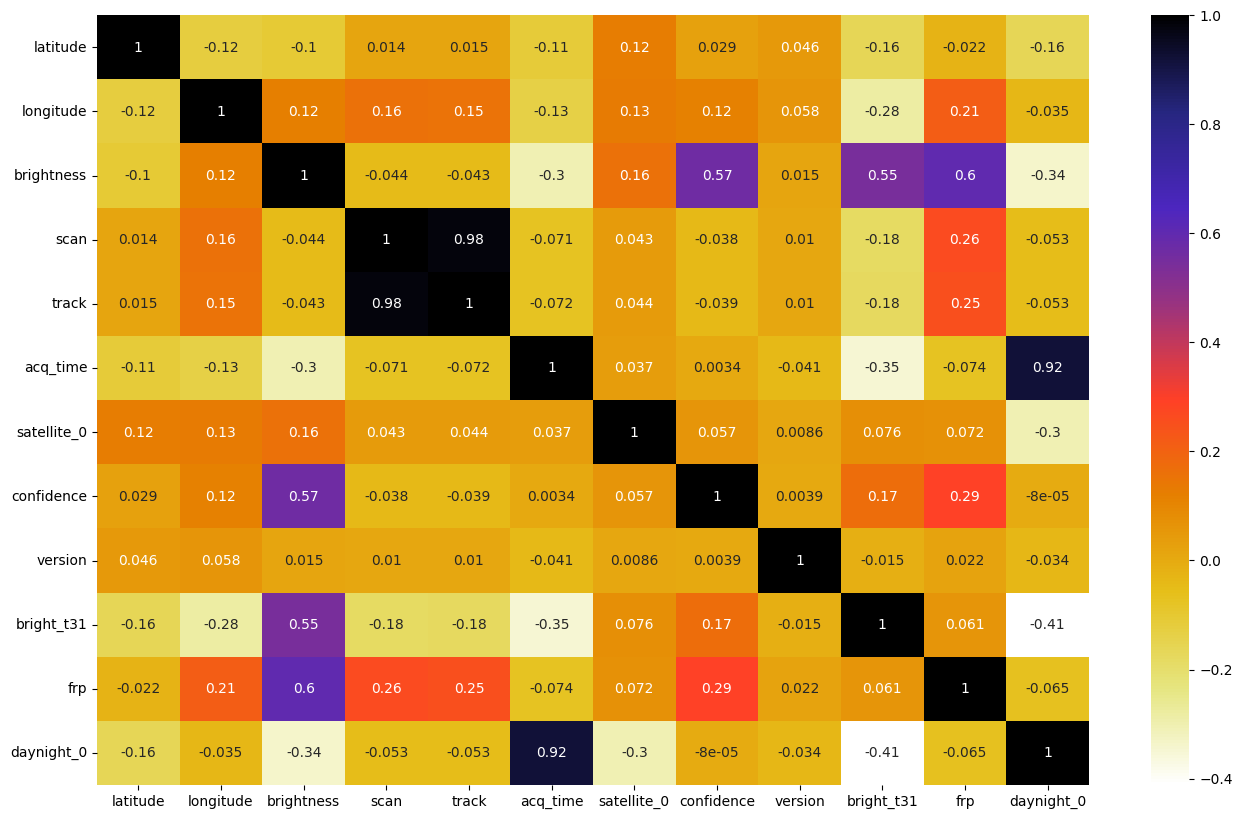

In [42]:
plt.figure(figsize=(16,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)

We will define a function to identify the highly correlated features to remove them

In [20]:
def correlation(dataset, threshold):
     col_corr = set() # Set of all the names of correlated columns
     corr_matrix = dataset.corr()
     for i in range(len(corr_matrix.columns)):
         for j in range(i):
             if (corr_matrix.iloc[i,j])>threshold: # we are interested in absolute coeff value
                 colname= corr_matrix.columns[i] # getting the name of column
                 col_corr.add(colname) 
     return col_corr

In [43]:
features= correlation(X_train,0.9)
print(set(features))

<ipython-input-20-edc5a87fb040>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{'track', 'daynight_0'}


In [44]:
# We can now drop the features track and daynight_0

X_train=X_train.drop(['track','daynight_0'],axis=1)

In [45]:
X_test=X_test.drop(['track','daynight_0'],axis=1)

Similarly will check for validation set

In [24]:
df_valid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Dataset/merged_nepal_modis_files.csv')

In [25]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63246 entries, 0 to 63245
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    63246 non-null  float64
 1   longitude   63246 non-null  float64
 2   brightness  63246 non-null  float64
 3   scan        63246 non-null  float64
 4   track       63246 non-null  float64
 5   acq_date    63246 non-null  object 
 6   acq_time    63246 non-null  int64  
 7   satellite   63246 non-null  object 
 8   instrument  63246 non-null  object 
 9   confidence  63246 non-null  int64  
 10  version     63246 non-null  float64
 11  bright_t31  63246 non-null  float64
 12  frp         63246 non-null  float64
 13  daynight    63246 non-null  object 
 14  type        63246 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 7.2+ MB


In [26]:
print(df_valid['satellite'].value_counts())
print(df_valid['daynight'].value_counts())
print(df_valid['type'].value_counts())

Aqua     37413
Terra    25833
Name: satellite, dtype: int64
D    51231
N    12015
Name: daynight, dtype: int64
0    63234
2       12
Name: type, dtype: int64


In [28]:
encoder = ce.BinaryEncoder(cols=['satellite'])
df_valid = encoder.fit_transform(df_valid)
encoder = ce.BinaryEncoder(cols=['daynight'])
df_valid = encoder.fit_transform(df_valid)

In [29]:
df_valid.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite_0,satellite_1,instrument,confidence,version,bright_t31,frp,daynight_0,daynight_1,type
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,500,0,1,MODIS,55,6.2,292.1,6.2,0,1,0
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,518,0,1,MODIS,87,6.2,293.7,43.0,0,1,0
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,601,0,1,MODIS,58,6.2,291.2,21.1,0,1,0
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,601,0,1,MODIS,37,6.2,287.4,17.1,0,1,0
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,506,0,1,MODIS,64,6.2,282.6,41.6,0,1,0


In [30]:
df_valid=df_valid.drop(['satellite_1','daynight_1'], axis=1)

In [31]:
df_valid['acq_time'] = df_valid['acq_time']//100 
df_valid.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite_0,instrument,confidence,version,bright_t31,frp,daynight_0,type
0,27.5921,87.5385,306.2,1.1,1.1,2000-11-01,5,0,MODIS,55,6.2,292.1,6.2,0,0
1,29.1006,81.9170,330.6,1.3,1.1,2000-11-06,5,0,MODIS,87,6.2,293.7,43.0,0,0
2,30.0881,81.3358,308.7,1.8,1.3,2000-11-07,6,0,MODIS,58,6.2,291.2,21.1,0,0
3,30.0841,81.3570,306.0,1.9,1.3,2000-11-07,6,0,MODIS,37,6.2,287.4,17.1,0,0
4,30.1060,81.9647,315.0,2.1,1.4,2000-11-08,5,0,MODIS,64,6.2,282.6,41.6,0,0


In [46]:
df_valid['acq_date'] = pd.to_datetime(df_valid['acq_date'])

In [47]:
df_valid['acq_date']

0         2000-11-01
1         2000-11-01
2         2000-11-01
3         2000-11-01
4         2000-11-01
             ...    
1517088   2021-12-31
1517089   2021-12-31
1517090   2021-12-31
1517091   2021-12-31
1517092   2021-12-31
Name: acq_date, Length: 1517093, dtype: datetime64[ns]

In [48]:
features= correlation(df_valid,0.9)
print(set(features))

<ipython-input-20-edc5a87fb040>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


set()


In [49]:
df_valid=df_train.drop(['track','daynight_0'],axis=1)

In [50]:
df_valid

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite_0,instrument,confidence,version,bright_t31,frp,type
0,23.6805,86.0949,318.9,1.2,2000-11-01,5,0,MODIS,67,6.20,303.3,12.1,2
1,22.7913,86.2102,326.4,1.2,2000-11-01,5,0,MODIS,54,6.20,299.4,19.8,0
2,22.7885,86.2037,320.7,1.2,2000-11-01,5,0,MODIS,65,6.20,299.1,15.0,0
3,22.7870,86.2150,319.7,1.2,2000-11-01,5,0,MODIS,66,6.20,298.5,13.8,0
4,18.7651,79.9640,315.9,2.7,2000-11-01,5,0,MODIS,18,6.20,298.3,28.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517088,21.1066,72.6336,307.9,1.5,2021-12-31,17,0,MODIS,73,6.03,290.5,16.1,2
1517089,19.1224,76.7451,303.2,1.0,2021-12-31,17,0,MODIS,54,6.03,288.0,6.5,0
1517090,19.2367,76.9620,304.1,1.0,2021-12-31,17,0,MODIS,59,6.03,288.2,7.2,0
1517091,23.7817,86.3960,306.2,1.2,2021-12-31,19,1,MODIS,65,6.03,287.8,10.8,2


In [53]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [54]:
#  Function to convert csv file
def convert_to_csv(dataset, filename):
    df = pd.DataFrame(dataset)  # Convert the dataset to a DataFrame
    df.to_csv(filename, index=False)  # Save the DataFrame to a CSV file without including the index

In [55]:
convert_to_csv(train_data, 'train_data.csv')

In [56]:
convert_to_csv(test_data, 'test_data.csv')

In [57]:
convert_to_csv(df_valid, 'valid_data.csv')